In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from numpy import expand_dims
import matplotlib.pyplot as plt
import math
from keras.models import load_model
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython import display
import ipywidgets as widgets
import numpy as np

1.Load the model

In [17]:
################### Load the Model ######################
# model = VGG16()

model_path = "/content/drive/MyDrive/GAN_Training_Data/Last_Updated_1/d_model.h5"
model = load_model(model_path)

model.summary()

################ Get the model layer information ####################

layer_number = []
layer_name = []

for i in range(len(model.layers)):
  layer_number.append(i)
  layer_name.append(model.layers[i].name)

df = pd.DataFrame({'Layer_num':layer_number,'Layer_name':layer_name})

print(df)

################ Getting image size information ####################

img_ht,img_width,img_channel = model.layers[0].output.shape[1],model.layers[0].output.shape[2],model.layers[0].output.shape[3]

############# Upload Image #######################################

image_path = "/content/download.jpeg"
image = load_img(image_path , target_size=(img_ht,img_width))

image = img_to_array(image)

image = expand_dims(image, axis=0)

image = preprocess_input(image)

################# Select Parameters ################################

dropdown = widgets.Dropdown(
    options=df['Layer_name'],
    description='Select a Layer:',
)

selected = None  # Initialize the 'selected' variable

def on_dropdown_change(change):
    global selected
    selected = change.new

# Observe the dropdown widget for changes
dropdown.observe(on_dropdown_change, names='value')

display.display(dropdown)

# You can now access the selected value using the 'selected' variable
print("Selected option:", selected)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 128)       204928    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 128)     

Dropdown(description='Select a Layer:', options=('input_3', 'conv2d_10', 'leaky_re_lu_18', 'dropout_8', 'conv2…

Selected option: None


7
1/1 [==============================] - 0s 200ms/step


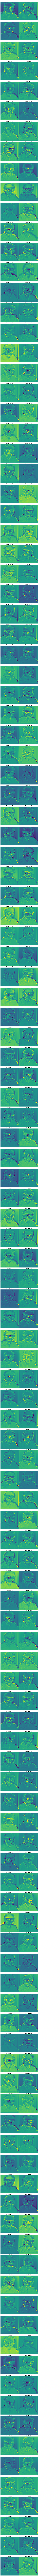

In [18]:
output_layer = df.loc[df['Layer_name'] == selected, 'Layer_num'].values[0]
print(output_layer)

result_model = Model(inputs= model.inputs,outputs=model.layers[output_layer].output)
features = result_model.predict(image)

# Calculate the number of rows and columns for the subplots
num_images = features.shape[3]
num_columns = 2
num_rows = (num_images + num_columns - 1) // num_columns

# Set the size of each subplot to (6.9, 6.9)
subplot_size = (4,4)

# Create a figure and axis for subplots with the adjusted size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * subplot_size[0], num_rows * subplot_size[1]))

# Iterate through the z dimension and plot each image
for i in range(num_images):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    # Extract and display the image with default size
    image = features[:, :, :, i]
    ax.imshow(np.transpose(image, (1, 2, 0)))  # Assuming (x, y, y, z) format, transpose as needed, and display at default size
    ax.set_title(f"Feature Map {i+1}")
    ax.axis('off')

# Hide any empty subplots
for i in range(num_images, num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()
